# <center> IIIT Vadodara </center>
## <center> Winter 2021-22 </center>
## <center> CS 612, CS 652, CS/IT 308 Machine Learning </center>
## <center> Lab#6 Support vector machine (SVM)</center>

**Problem 1)** Classify the given data using linear SVM algorithm.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [2]:
# linear data
X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

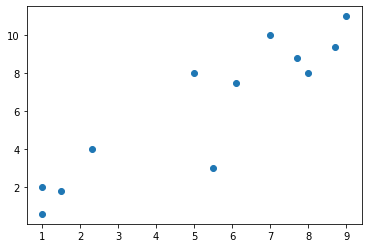

In [3]:
# show unclassified data
plt.scatter(X, y)
plt.show()

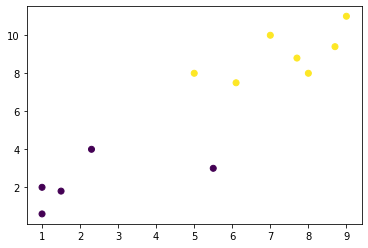

In [26]:
# shaping data for training the model
training_X = np.vstack((X, y)).T
training_y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]
plt.scatter(training_X[:,0],training_X[:,1],c=training_y)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
w = [[0.1332713  0.42667492]]
b = [-3.01308577]


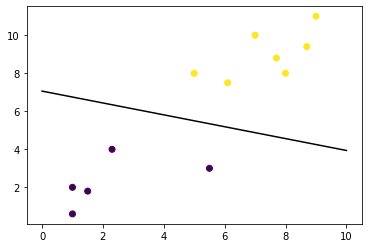

In [38]:
# define the model
from sklearn.svm import SVC
clf=SVC(kernel='linear')
clf.fit(training_X,training_y)
print(clf.get_params(deep=True))
w=clf.coef_
b=clf.intercept_
plt.scatter(training_X[:,0],training_X[:,1],c=training_y)
print('w =',clf.coef_)
print('b =',clf.intercept_)
x=np.linspace(0,10,100)
plt.plot(x,(w[0,0]*x+b)/-w[0,1],c='black')
plt.show()

**Problem 2)** Load the data. The data description can be found in below link.

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

<br>

Split the data to train and test set. More information can be found here.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

<br>

Write a code for linear SVM model. Examples can be found here.

https://github.com/soloice/SVM-python

https://gist.github.com/mblondel/586753/f740949d0336484567dd422fe53445ac8821f5b2

<br>

Learn and test the model for different hyperparameters and check the accuracy.


In [72]:
#Write your code here.
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
import sklearn
rawdata = np.array(pd.read_csv("banknote.txt"))
x=rawdata[:,0:4]
y=rawdata[:,4]
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.3, shuffle=True)
clf=SVC(kernel="linear")
clf.fit(X_train,y_train)
predictions=clf.predict(X_test)
print(classification_report(y_test,predictions))





              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       224
         1.0       0.98      0.99      0.99       188

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



**Problem 3)** Classify the given data using non-linear SVM.


In [73]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

In [74]:
# non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)

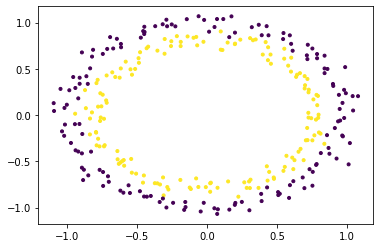

In [75]:
# show raw non-linear data
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

In [98]:
clf=SVC(kernel='rbf')
clf.fit(circle_X,circle_y)
print(clf.get_params(deep=True))
#print(w,b)

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [99]:
# Plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

	# shape data
    
    ax.contour(X,Y,P,colors='k',levels=0)
	# get the decision boundary based on the model
    
    
    # plot decision boundary
    

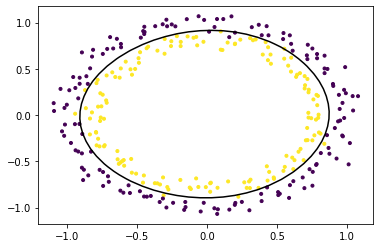

In [100]:
# plot data and decision boundary
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plot_decision_boundary(clf)
plt.show()